In [2]:
import sys
sys.path.insert(0, '../scripts_project')

from classifiers import *
from helpers import*
from proj1_helpers import *
from preprocessing import preprocess
from validation import *
from plots import *

In [ ]:
#load the data
y, x, ids_train = load_csv_data('../data/train.csv')
y_train, tx_train = preprocess(
            y, x, "NanToMean", standardize_=True
        )

#split the data into train and test:
x_train, y_train, x_test, y_test = split_data(tx_train, y_train, 0.8, verbose=True, )
y_train = (y_train + 1)/2.
y_test = (y_test + 1)/2.
print('x_train, x_test:', x_train.shape, y_test.shape)
print('y_train, y_test:', y_train.shape, y_test.shape)
print('values of y_train', 'values of y_test', set(y_train), set(y_test))

# Speed up training: using batches:
Batches speed training up quite a bit. What it the best range to do this ? 

In [17]:
batch_sizes = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
clfiers_batches = []
for b in batch_sizes:
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= 1e-6,
                max_iterations= 5000,
                min_max_iterations = 300,
                w_sampling_distr='zero',
                threshold=1e-6,
                )
        clf.train(y_train, x_train, 
                batch_size= b, 
                verbose = False, 
                tx_validation = x_test, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)
        clfiers_batches += [clf]


Text(0.5, 1.0, 'Batch sizes affects the convergence of the algo')

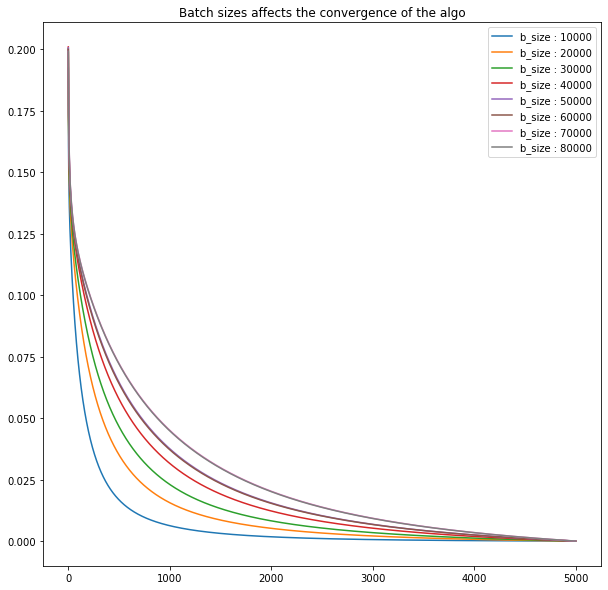

In [19]:
# different batch sizes summary plot:
#plotting stuff
fig = plt.figure(figsize=(10, 10))
for c, b in zip(clfiers_batches, batch_sizes):
        minimum = min(c.params['losses'])
        maximum = max(c.params['losses'])
        losses = c.params['losses']
        losses = (losses - minimum)/maximum
        zoom = 0
        plt.plot(zoom + np.arange(len(losses[zoom:])), losses[zoom:], label = "b_size : " +str(b))
        plt.legend()
plt.title("Batch sizes affects the convergence of the algo")

In [20]:
clfiers[0].params.keys()

dict_keys(['name', 'lambda_', 'regulairizer', 'gamma', 'max_iterations', 'threshold', 'weights', 'normalize_gaddient', 'losses', 'accuyracues_while_training_train', 'accuyracues_while_training_validation', 'stored_gradients', 'initial_w', 'w_sampling_distr'])

Text(0, 0.5, 'Accuracy on test set')

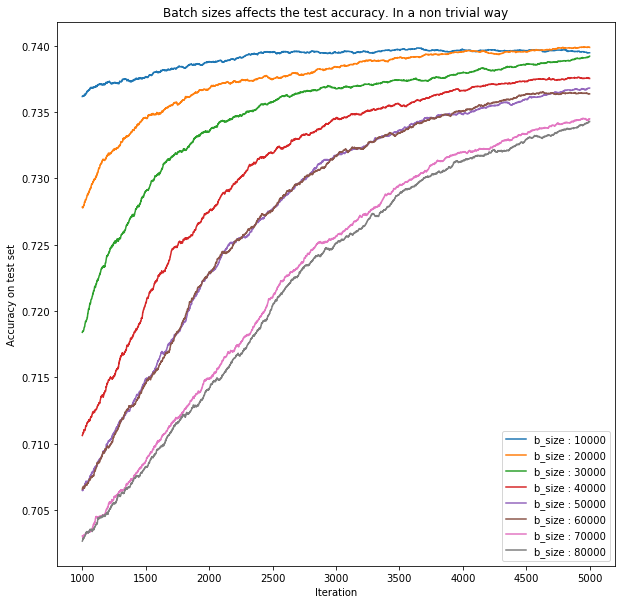

In [21]:
# different batch sizes summary plot:
#plotting stuff
fig = plt.figure(figsize=(10, 10))
for c, b in zip(clfiers_batches, batch_sizes):
        losses = c.params['accuyracues_while_training_validation']
        zoom = 1000
        plt.plot(zoom + np.arange(len(losses[zoom:])), losses[zoom:], label = "b_size : " +str(b))
        plt.legend()
plt.title("Batch sizes affects the test accuracy. In a non trivial way")
plt.xlabel("Iteration")
plt.ylabel('Accuracy on test set')

## Does the batch size affect the gamma range ? 
We don't know. Possibly yes

# Other stuff

In [ ]:
from logReg_gridSearch import *
gss = GridSearch_Simulation('../data/train.csv', '../data/test.csv') 
acc_tr, acc_te, losses_tr, losses_te  = gss.train_model(dataset, l_rate, b_size, initial_w_dist)

In [ ]:
clf.get_params_and_results(x_train, x_test, y_train, y_test)

{'accuracy_train': 0.69169,
 'accuracy_test': 0.69242,
 'params': {'name': 'LogisticRegression',
  'lambda_': 0,
  'regulairizer': None,
  'gamma': 1e-10,
  'max_iterations': 1800,
  'threshold': 0,
  'weights': array([-0.01843706, -0.89697075, -0.02075554, -0.25920814,  0.56148697,
          0.10750221,  0.76100716,  0.20950545, -0.84842473, -0.50201431,
         -0.64809637, -0.11197115, -0.02858168,  0.7618703 , -0.90262245,
          0.6490594 ,  0.01546187,  0.32066341,  0.90402211, -0.23952832,
          0.57396276,  0.59472485, -0.56803769,  0.2199465 ,  0.16666141,
         -0.39056725, -0.95293877, -0.18431507, -0.24476245, -0.0511362 ]),
  'losses': [0.3781970988869389,
   0.37807129908995385,
   0.37795257231070273,
   0.3778489728012784,
   0.37772177647440797,
   0.37759532768977855,
   0.3775162505757743,
   0.3774361555566297,
   0.3773128746056228,
   0.37718437439426333,
   0.3770480658670966,
   0.3768968469250383,
   0.3767073682217996,
   0.37651822200518603,
   0.3